In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from google.colab import files, drive
from bs4 import BeautifulSoup


In [ ]:
drive.mount("D")

Mounted at D


 **Data for the 2020 Olympics**

In [ ]:
url2020 = "https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medal-standings.htm"
res2020 = requests.get(url2020)
soup_20 = BeautifulSoup(res2020.content)

In [ ]:
type(soup_20)

bs4.BeautifulSoup

In [ ]:
country_divs = soup_20.find_all(attrs={"class": "playerTag"})
list_of_ioc_codes_2020 = [div['country'] for div in country_divs]

In [ ]:
list_of_ioc_codes_2020[:10]

['USA', 'CHN', 'JPN', 'GBR', 'ROC', 'AUS', 'NED', 'FRA', 'GER', 'ITA']

In [ ]:
country_names_tags = soup_20.select(".country")
list_of_countries_2020 = [tag.text for tag in country_names_tags]

In [ ]:
list_of_countries_2020[:10]

['United States of America',
 "People's Republic of China",
 'Japan',
 'Great Britain',
 'ROC',
 'Australia',
 'Netherlands',
 'France',
 'Germany',
 'Italy']

In [ ]:
total_medals_tags = soup_20.find_all("td")[5::8]
list_of_total_medals_2020 = [item.strong.text for item in total_medals_tags if item.strong != None]

In [ ]:
list_of_total_medals_2020[:10]

['113', '88', '58', '65', '71', '46', '36', '33', '37', '40']

In [ ]:
gold_medal_tags = soup_20.find_all("td")[2::8]
list_of_gold_medals_2020 = [tag.text[2:] for tag in gold_medal_tags]

In [ ]:
list_of_gold_medals_2020[:10]

['39 ', '38 ', '27 ', '22 ', '20 ', '17 ', '10 ', '10 ', '10 ', '10 ']

In [ ]:
num_countries = len(list_of_total_medals_2020)
unique_list_of_ioc_codes_2020 = list_of_ioc_codes_2020[:num_countries]
unique_list_of_countries_2020 = list_of_countries_2020[:num_countries]
final_list_of_gold_medals_2020 = list_of_gold_medals_2020[:num_countries]

In [ ]:
df_olympics_2020 = pd.DataFrame({"Country Name": unique_list_of_countries_2020, 
                                 "IOC Code": unique_list_of_ioc_codes_2020, "gold_medals_2020": final_list_of_gold_medals_2020, "total_medals_2020":list_of_total_medals_2020 })
df_olympics_2020 = df_olympics_2020.replace("", 0)

df_olympics_2020.iloc[:, -2:] = df_olympics_2020.iloc[:,-2:].applymap(lambda x: int(x))

In [ ]:
df_olympics_2020.head(25)

,Country Name,IOC Code,gold_medals_2020,total_medals_2020
0,United States of America,USA,39,113
1,People's Republic of China,CHN,38,88
2,Japan,JPN,27,58
3,Great Britain,GBR,22,65
4,ROC,ROC,20,71
5,Australia,AUS,17,46
6,Netherlands,NED,10,36
7,France,FRA,10,33
8,Germany,GER,10,37
9,Italy,ITA,10,40


**2016 Olympics data**

In [ ]:
url16 = "https://olympics.com/en/olympic-games/rio-2016/medals"
res16 = requests.get(url16)
soup_16 = BeautifulSoup(res16.content)

In [ ]:
ioc_codes_tags_2016 = soup_16.find_all(name="div", attrs={"data-cy" : "tri-letter-code"})
list_of_ioc_codes_2016 = [tag.text for tag in ioc_codes_tags_2016]

In [ ]:
list_of_ioc_codes_2016[:10]

['USA', 'GBR', 'CHN', 'RUS', 'GER', 'JPN', 'FRA', 'KOR', 'ITA', 'AUS']

In [ ]:
medals_tags_2016  = soup_16.find_all(name="span", attrs={"data-cy": "medal-main"})
list_of_gold_medals_2016 = [tag.text for tag in medals_tags_2016][0::4]
list_of_total_medals_2016 = [tag.text for tag in medals_tags_2016][3::4]

In [ ]:
list_of_gold_medals_2016[:10]

['46', '27', '26', '19', '17', '12', '10', '9', '8', '8']

In [ ]:
list_of_total_medals_2016[:10]

['121', '67', '70', '56', '42', '41', '42', '21', '28', '29']

In [ ]:
df_2016 = pd.DataFrame({"IOC Code": list_of_ioc_codes_2016, "gold_medals_2016": list_of_gold_medals_2016,"total_medals_2016": list_of_total_medals_2016})
df_2016 = df_2016.replace("-", 0)
df_2016.iloc[:, -2:] = df_2016.iloc[:,-2:].applymap(lambda x: int(x))

In [ ]:
df_2016.tail()

,IOC Code,gold_medals_2016,total_medals_2016
81,EST,0,1
82,DOM,0,1
83,AUT,0,1
84,UAE,0,1
85,POR,0,1


**2012 Olympics Data**

In [ ]:
url12 = "https://olympics.com/en/olympic-games/london-2012/medals"
res12 = requests.get(url12)
soup_12 = BeautifulSoup(res12.content)

In [ ]:
ioc_codes_tags_2012 = soup_12.find_all(name="div", attrs={"data-cy" : "tri-letter-code"})
list_of_ioc_codes_2012 = [tag.text for tag in ioc_codes_tags_2012]

In [ ]:
list_of_ioc_codes_2012[:10]

['USA', 'CHN', 'GBR', 'RUS', 'KOR', 'GER', 'FRA', 'AUS', 'ITA', 'HUN']

In [ ]:
medals_tags_2012  = soup_12.find_all(name="span", attrs={"data-cy": "medal-main"})
list_of_gold_medals_2012 = [tag.text for tag in medals_tags_2012][0::4]
list_of_total_medals_2012 = [tag.text for tag in medals_tags_2012][3::4]

In [ ]:
list_of_gold_medals_2012[:10]

['46', '38', '29', '20', '13', '11', '11', '8', '8', '8']

In [ ]:
list_of_total_medals_2012[:10]

['104', '91', '65', '67', '30', '44', '35', '35', '28', '18']

In [ ]:
df_2012 = pd.DataFrame({"IOC Code": list_of_ioc_codes_2012, "gold_medals_2012": list_of_gold_medals_2012,"total_medals_2012": list_of_total_medals_2012})
df_2012 = df_2012.replace("-", 0)
df_2012.iloc[:, -2:] = df_2012.iloc[:,-2:].applymap(lambda x: int(x))

In [ ]:
df_2012.tail()

,IOC Code,gold_medals_2012,total_medals_2012
80,AFG,0,1
81,HKG,0,1
82,TJK,0,1
83,CMR,0,1
84,MAR,0,1


**2008 Olympics Data**

In [ ]:
url08 = "https://olympics.com/en/olympic-games/beijing-2008/medals"
res08 = requests.get(url08)
soup_08 = BeautifulSoup(res08.content)

In [ ]:
ioc_codes_tags_2008 = soup_08.find_all(name="div", attrs={"data-cy" : "tri-letter-code"})
list_of_ioc_codes_2008 = [tag.text for tag in ioc_codes_tags_2008]

In [ ]:
list_of_ioc_codes_2008[:10]

['CHN', 'USA', 'RUS', 'GBR', 'GER', 'AUS', 'KOR', 'JPN', 'ITA', 'FRA']

In [ ]:
medals_tags_2008  = soup_08.find_all(name="span", attrs={"data-cy": "medal-main"})
list_of_gold_medals_2008 = [tag.text for tag in medals_tags_2008][0::4]
list_of_total_medals_2008 = [tag.text for tag in medals_tags_2008][3::4]

In [ ]:
list_of_gold_medals_2016[:10]

['46', '27', '26', '19', '17', '12', '10', '9', '8', '8']

In [ ]:
list_of_total_medals_2016[:10]

['121', '67', '70', '56', '42', '41', '42', '21', '28', '29']

In [ ]:
df_2008 = pd.DataFrame({"IOC Code": list_of_ioc_codes_2008, "gold_medals_2008": list_of_gold_medals_2008,"total_medals_2008": list_of_total_medals_2008})
df_2008 = df_2008.replace("-", 0)
df_2008.iloc[:, -2:] = df_2008.iloc[:,-2:].applymap(lambda x: int(x))

In [ ]:
df_2008.tail()

,IOC Code,gold_medals_2008,total_medals_2008
82,ISR,0,1
83,MRI,0,1
84,AFG,0,1
85,VEN,0,1
86,TOG,0,1


In [ ]:
def combine_olympics_data(df_list):

    df1 = df_list[0]
    mask = df1["IOC Code"] == "ROC" #These 2 lines of code ensures we get to merge 2020's ROC medals with Russia's previous medals 
    df1["IOC Code"].loc[mask] = "RUS"
    for df in df_list[1:]:
    df1 = pd.merge(df1, df, on="IOC Code", how="outer")
    df1 = df1.fillna(0)
    return df1

In [ ]:
olympics_data = combine_olympics_data([df_olympics_2020, df_2016, df_2012, df_2008])
olympics_data.head(20)

,Country Name,IOC Code,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008
0,United States of America,USA,39.0,113.0,46.0,121.0,46.0,104.0,36,112
1,People's Republic of China,CHN,38.0,88.0,26.0,70.0,38.0,91.0,48,100
2,Japan,JPN,27.0,58.0,12.0,41.0,7.0,38.0,9,25
3,Great Britain,GBR,22.0,65.0,27.0,67.0,29.0,65.0,19,51
4,ROC,RUS,20.0,71.0,19.0,56.0,20.0,67.0,24,60
5,Australia,AUS,17.0,46.0,8.0,29.0,8.0,35.0,14,46
6,Netherlands,NED,10.0,36.0,8.0,19.0,6.0,20.0,7,16
7,France,FRA,10.0,33.0,10.0,42.0,11.0,35.0,7,43
8,Germany,GER,10.0,37.0,17.0,42.0,11.0,44.0,16,41
9,Italy,ITA,10.0,40.0,8.0,28.0,8.0,28.0,8,27


**Let's get a list of country codes**

In [ ]:
ioc_codes_url ="https://en.wikipedia.org/wiki/List_of_IOC_country_codes"
tables = pd.read_html(ioc_codes_url)
ioc_codes_df = tables[0]

In [ ]:
ioc_codes_df.head()

,Code,National Olympic Committee,Other codes used,Link
0,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,NaN,[3]
1,ALB,Albania,NaN,[4]
2,ALG,Algeria,AGR (1964)AGL (1968 S) from Spanish Argelia,[5]
3,AND,Andorra,NaN,[6]
4,ANG,Angola,ANO (As referenced in IAAF World Championships...,[7]


In [ ]:
ioc_codes_df.shape

(206, 4)

In [ ]:
ioc_codes_df.Code = ioc_codes_df.Code.apply(lambda x: x[-3:])
ioc_codes_df = ioc_codes_df.drop(["Other codes used", "Link"], axis=1)
ioc_codes_df = ioc_codes_df.rename(columns={"Code": "IOC Code"})
ioc_codes_df.head()

,IOC Code,National Olympic Committee
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,AND,Andorra
4,ANG,Angola


In [ ]:
files.upload()

Saving countries_codes.csv to countries_codes.csv


{'countries_codes.csv': b'"Country","Alpha-2 code","Alpha-3 code","Numeric code","Latitude (average)","Longitude (average)"\n"Afghanistan", "AF", "AFG", "4", "33", "65"\n"Albania", "AL", "ALB", "8", "41", "20"\n"Algeria", "DZ", "DZA", "12", "28", "3"\n"American Samoa", "AS", "ASM", "16", "-14.3333", "-170"\n"Andorra", "AD", "AND", "20", "42.5", "1.6"\n"Angola", "AO", "AGO", "24", "-12.5", "18.5"\n"Anguilla", "AI", "AIA", "660", "18.25", "-63.1667"\n"Antarctica", "AQ", "ATA", "10", "-90", "0"\n"Antigua and Barbuda", "AG", "ATG", "28", "17.05", "-61.8"\n"Argentina", "AR", "ARG", "32", "-34", "-64"\n"Armenia", "AM", "ARM", "51", "40", "45"\n"Aruba", "AW", "ABW", "533", "12.5", "-69.9667"\n"Australia", "AU", "AUS", "36", "-27", "133"\n"Austria", "AT", "AUT", "40", "47.3333", "13.3333"\n"Azerbaijan", "AZ", "AZE", "31", "40.5", "47.5"\n"Bahamas", "BS", "BHS", "44", "24.25", "-76"\n"Bahrain", "BH", "BHR", "48", "26", "50.55"\n"Bangladesh", "BD", "BGD", "50", "24", "90"\n"Barbados", "BB", "BRB

In [ ]:
country_codes_df = pd.read_csv("countries_codes.csv")

In [ ]:
country_codes_df.shape

(256, 6)

In [ ]:
country_codes_df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [ ]:
country_codes_df = country_codes_df.drop(['Numeric code','Latitude (average)', 'Longitude (average)'], axis=1)
country_codes_df = country_codes_df.rename(columns={'Alpha-3 code': "Country Code", 'Alpha-2 code': "Flag Code" })
country_codes_df.loc[:, ["Flag Code", "Country Code"]] = country_codes_df.loc[:, ["Flag Code", "Country Code"]].applymap(lambda x: x.strip("\" "))

country_codes_df.head()

,Country,Flag Code,Country Code
0,Afghanistan,AF,AFG
1,Albania,AL,ALB
2,Algeria,DZ,DZA
3,American Samoa,AS,ASM
4,Andorra,AD,AND


In [ ]:
ioc_name_but_not_country_name = [country for country in list(ioc_codes_df['National Olympic Committee']) if country not in list(country_codes_df["Country"])]

In [ ]:
ioc_name_but_not_country_name

['Republic of the Congo',
 'Democratic Republic of the Congo',
 'Federated States of Micronesia',
 'The Gambia',
 'Great Britain',
 'Hong Kong, China',
 'Iran',
 'Virgin Islands',
 'British Virgin Islands',
 'Kosovo',
 'Laos',
 'Moldova',
 'North Macedonia',
 'Palestine',
 'North Korea',
 'São Tomé and Príncipe',
 'Eswatini',
 'Syria',
 'Tanzania',
 'East Timor',
 'Chinese Taipei[7]']

In [ ]:
country_name_but_not_ioc_name = [country for country in list(country_codes_df["Country"]) if country not in list(ioc_codes_df['National Olympic Committee'])]

In [ ]:
import pprint
pprint.pprint(country_name_but_not_ioc_name)

['Anguilla',
 'Antarctica',
 'Bolivia, Plurinational State of',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Brunei Darussalam',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo',
 'Congo, the Democratic Republic of the',
 "Côte d'Ivoire",
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'French Southern Territories',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guernsey',
 'Heard Island and McDonald Islands',
 'Holy See (Vatican City State)',
 'Hong Kong',
 'Iran, Islamic Republic of',
 'Isle of Man',
 'Jersey',
 "Korea, Democratic People's Republic of",
 'Korea, Republic of',
 "Lao People's Democratic Republic",
 'Libyan Arab Jamahiriya',
 'Macao',
 'Macedonia, the former Yugoslav Republic of',
 'Martinique',
 'Mayotte',
 'Micronesia, Federated States of',
 'Moldova, Republic of',
 'Montserrat',
 'Burma',
 'Netherlands Antilles',
 'New Caledonia',
 'Niue',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palestini

In [ ]:
replacements_for_ioc_names = ["Congo", 'Congo, the Democratic Republic of the',  'Micronesia, Federated States of', 'Gambia', 'United Kingdom', 'Hong Kong', 
                        'Iran, Islamic Republic of','Virgin Islands, U.S.', 'Virgin Islands, British', "Kosovo", "Lao People's Democratic Republic", 'Moldova, Republic of', 
                        'Macedonia, the former Yugoslav Republic of','Palestinian Territory, Occupied', "Korea, Democratic People's Republic of", 'Sao Tome and Principe', 
                        'Swaziland', 'Syrian Arab Republic', 'Tanzania, United Republic of','Timor-Leste', 'Taiwan']

In [ ]:
ioc_codes_df['Reference Name'] = ioc_codes_df["National Olympic Committee"]
ioc_codes_df['Reference Name'] = ioc_codes_df['Reference Name'].replace(ioc_name_but_not_country_name, replacements_for_ioc_names)
ioc_codes_df.iloc[30:40, :]

,IOC Code,National Olympic Committee,Reference Name
30,BUR,Burkina Faso,Burkina Faso
31,CAF,Central African Republic,Central African Republic
32,CAM,Cambodia,Cambodia
33,CAN,Canada,Canada
34,CAY,Cayman Islands,Cayman Islands
35,CGO,Republic of the Congo,Congo
36,CHA,Chad,Chad
37,CHI,Chile,Chile
38,CHN,China,China
39,CIV,Ivory Coast,Ivory Coast


In [ ]:
ioc_codes_df.shape

(206, 3)

In [ ]:
final_country_and_IOC_code_df = pd.merge(ioc_codes_df, country_codes_df, left_on="Reference Name", right_on="Country", how="inner")
final_country_and_IOC_code_df.head()

,IOC Code,National Olympic Committee,Reference Name,Country,Flag Code,Country Code
0,AFG,Afghanistan,Afghanistan,Afghanistan,AF,AFG
1,ALB,Albania,Albania,Albania,AL,ALB
2,ALG,Algeria,Algeria,Algeria,DZ,DZA
3,AND,Andorra,Andorra,Andorra,AD,AND
4,ANG,Angola,Angola,Angola,AO,AGO


In [ ]:
print(final_country_and_IOC_code_df.shape, ioc_codes_df.shape)

(205, 6) (206, 3)


In [ ]:
[code for code in list(ioc_codes_df["IOC Code"]) if code not in list(final_country_and_IOC_code_df['IOC Code'])]

['KOS']

In [ ]:
final_country_and_IOC_code_df.loc[205, :] = ["KOS", "Kosovo", "Kosovo", "Kosovo", "XK", "XKX"]
final_country_and_IOC_code_df = final_country_and_IOC_code_df.replace('Chinese Taipei[7]', 'Chinese Taipei')

In [ ]:
final_country_and_IOC_code_df.tail()

,IOC Code,National Olympic Committee,Reference Name,Country,Flag Code,Country Code
201,VIN,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,VC,VCT
202,YEM,Yemen,Yemen,Yemen,YE,YEM
203,ZAM,Zambia,Zambia,Zambia,ZM,ZMB
204,ZIM,Zimbabwe,Zimbabwe,Zimbabwe,ZW,ZWE
205,KOS,Kosovo,Kosovo,Kosovo,XK,XKX


**Merging the IOC code data and the Country Code Data**

In [ ]:
olympics_data.shape

(117, 10)

In [ ]:
final_country_and_IOC_code_df.shape

(206, 6)

In [ ]:
olympics_data.head()

,Country Name,IOC Code,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008
0,United States of America,USA,39.0,113.0,46.0,121.0,46.0,104.0,36,112
1,People's Republic of China,CHN,38.0,88.0,26.0,70.0,38.0,91.0,48,100
2,Japan,JPN,27.0,58.0,12.0,41.0,7.0,38.0,9,25
3,Great Britain,GBR,22.0,65.0,27.0,67.0,29.0,65.0,19,51
4,ROC,RUS,20.0,71.0,19.0,56.0,20.0,67.0,24,60


In [ ]:
olympics_data_with_country_codes = pd.merge(final_country_and_IOC_code_df, olympics_data, on="IOC Code", how="inner")

In [ ]:
olympics_data_with_country_codes.shape

(116, 15)

In [ ]:
missing_data = [code for code in list(olympics_data["IOC Code"]) if code not in list(final_country_and_IOC_code_df["IOC Code"])]

In [ ]:
missing_data

['IOA']

In [ ]:
olympics_data_with_country_codes.head()

,IOC Code,National Olympic Committee,Reference Name,Country,Flag Code,Country Code,Country Name,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008
0,AFG,Afghanistan,Afghanistan,Afghanistan,AF,AFG,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,ALG,Algeria,Algeria,Algeria,DZ,DZA,0,0.0,0.0,0.0,2.0,1.0,1.0,0,2
2,ARG,Argentina,Argentina,Argentina,AR,ARG,Argentina,0.0,3.0,3.0,4.0,1.0,4.0,2,6
3,ARM,Armenia,Armenia,Armenia,AM,ARM,Armenia,0.0,4.0,1.0,4.0,0.0,2.0,0,5
4,AUS,Australia,Australia,Australia,AU,AUS,Australia,17.0,46.0,8.0,29.0,8.0,35.0,14,46


**Merging the olympics data and population data**

In [ ]:
files.upload()

Saving Population_data.csv to Population_data.csv


{'Population_data.csv': b'\xef\xbb\xbf"Data Source","World Development Indicators",\r\n\r\n"Last Updated Date","2021-07-21",\r\n\r\n"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020",\r\n"Aruba","ABW","Population, total","SP.POP.TOTL","54208","55434","56234","56699","57029","57357","57702","58044","58377","58734","59070","59442","59849","60236","60527","60653","60586","60366","60102","59972","60097","60561","61341","62213","62826","63024","62645","61838","61072","61033","62152","64623","68240","72495","76705","80324","83211","85450","87280","89009","9086

In [ ]:
population_data =pd.read_csv("Population_data.csv", skiprows=4)

In [ ]:
population_df = population_data[['Country Name', "Country Code", "2007", "2011", "2015", "2020"]]

In [ ]:
new_columns = list(population_df.columns[:2]) + [col + " population in millions" for col in list(population_df.columns[2:])]
new_columns

['Country Name',
 'Country Code',
 '2007 population in millions',
 '2011 population in millions',
 '2015 population in millions',
 '2020 population in millions']

In [ ]:
population_df.iloc[:,2:] = population_df.iloc[:,2:] / 1e6
population_df.columns = new_columns


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
mask = olympics_data_with_country_codes["IOC Code"] == "TPE"
olympics_data_with_country_codes.loc[mask, :]

,IOC Code,National Olympic Committee,Reference Name,Country,Flag Code,Country Code,Country Name,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008
103,TPE,Chinese Taipei,Taiwan,Taiwan,TW,TWN,Chinese Taipei,2.0,12.0,1.0,3.0,1.0,2.0,1,4


In [ ]:
population_df.tail()

,Country Name,Country Code,2007 population in millions,2011 population in millions,2015 population in millions,2020 population in millions
261,Kosovo,XKX,1.733404,1.791000,1.788196,1.775378
262,"Yemen, Rep.",YEM,21.282514,23.807586,26.497881,29.825968
263,South Africa,ZAF,49.119766,52.003759,55.386369,59.308690
264,Zambia,ZMB,12.502958,14.023199,15.879370,18.383956
265,Zimbabwe,ZWE,12.255920,12.894323,13.814642,14.862927


In [ ]:
population_df.shape

(266, 6)

In [ ]:
population_df.loc[266, :] = ["Taiwan", "TWN", 22.968, 23.225, 23.492, 23.57]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_df = pd.merge(olympics_data_with_country_codes, population_df, on="Country Code", how="inner")

In [ ]:
final_df.shape

(116, 20)

In [ ]:
final_missing_data = [code for code in list(olympics_data_with_country_codes["Country Code"]) if code not in list(population_df['Country Code'])]

In [ ]:
final_missing_data

[]

In [ ]:
final_df.columns

Index(['IOC Code', 'National Olympic Committee', 'Reference Name', 'Country',
       'Flag Code', 'Country Code', 'Country Name_x', 'gold_medals_2020',
       'total_medals_2020', 'gold_medals_2016', 'total_medals_2016',
       'gold_medals_2012', 'total_medals_2012', 'gold_medals_2008',
       'total_medals_2008', 'Country Name_y', '2007 population in millions',
       '2011 population in millions', '2015 population in millions',
       '2020 population in millions'],
      dtype='object')

In [ ]:
final_df = final_df.loc[:, ['IOC Code', "Flag Code", 'National Olympic Committee', 'Country', 'gold_medals_2020','total_medals_2020', 'gold_medals_2016', 'total_medals_2016',
       'gold_medals_2012', 'total_medals_2012', 'gold_medals_2008',
       'total_medals_2008', '2007 population in millions',
       '2011 population in millions', '2015 population in millions',
       '2020 population in millions']]

In [ ]:
final_df.to_csv("D/My Drive/2021 /final_df.csv")

In [ ]:
final_df["gold_medals_ratio_2020"] = final_df["gold_medals_2020"] / final_df['2020 population in millions']
final_df["total_medals_ratio_2020"] = final_df["total_medals_2020"] / final_df['2020 population in millions']
final_df["gold_medals_ratio_2016"] = final_df["gold_medals_2016"]/ final_df['2015 population in millions']
final_df["total_medals_ratio_2016"] = final_df["total_medals_2016"] / final_df['2015 population in millions']
final_df["gold_medals_ratio_2012"] = final_df["gold_medals_2012"] / final_df['2011 population in millions']
final_df["total_medals_ratio_2012"] = final_df["total_medals_2012"] / final_df['2011 population in millions']
final_df["gold_medals_ratio_2008"] = final_df["gold_medals_2008"]/ final_df['2007 population in millions']
final_df["total_medals_ratio_2008"] = final_df["total_medals_2008"] / final_df['2007 population in millions']



In [ ]:
final_df

,IOC Code,Flag Code,National Olympic Committee,Country,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008,2007 population in millions,2011 population in millions,2015 population in millions,2020 population in millions,gold_medals_ratio_2020,total_medals_ratio_2020,gold_medals_ratio_2016,total_medals_ratio_2016,gold_medals_ratio_2012,total_medals_ratio_2012,gold_medals_ratio_2008,total_medals_ratio_2008
0,AFG,AF,Afghanistan,Afghanistan,0.0,0.0,0.0,0.0,0.0,1.0,0,1,27.100542,30.117411,34.413603,38.928341,0.000000,0.000000,0.000000,0.000000,0.000000,0.033203,0.000000,0.036900
1,ALG,DZ,Algeria,Algeria,0.0,0.0,0.0,2.0,1.0,1.0,0,2,34.166976,36.661438,39.728020,43.851043,0.000000,0.000000,0.000000,0.050342,0.027277,0.027277,0.000000,0.058536
2,ARG,AR,Argentina,Argentina,0.0,3.0,3.0,4.0,1.0,4.0,2,6,39.684303,41.261490,43.131966,45.376763,0.000000,0.066113,0.069554,0.092739,0.024236,0.096943,0.050398,0.151193
3,ARM,AM,Armenia,Armenia,0.0,4.0,1.0,4.0,0.0,2.0,0,5,2.932615,2.876536,2.925559,2.963234,0.000000,1.349877,0.341815,1.367260,0.000000,0.695281,0.000000,1.704963
4,AUS,AU,Australia,Australia,17.0,46.0,8.0,29.0,8.0,35.0,14,46,20.827600,22.340024,23.815995,25.687041,0.661812,1.790786,0.335909,1.217669,0.358102,1.566695,0.672185,2.208608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,UZB,UZ,Uzbekistan,Uzbekistan,3.0,5.0,4.0,13.0,0.0,2.0,0,4,26.868000,29.339400,31.298900,34.232050,0.087637,0.146062,0.127800,0.415350,0.000000,0.068168,0.000000,0.148876
112,VEN,VE,Venezuela,Venezuela,1.0,4.0,0.0,3.0,1.0,1.0,0,1,27.247601,28.887873,30.081827,28.435943,0.035167,0.140667,0.000000,0.099728,0.034617,0.034617,0.000000,0.036700
113,VIE,VN,Vietnam,Vietnam,0.0,0.0,1.0,2.0,0.0,0.0,0,1,85.419588,88.871384,92.677082,97.338583,0.000000,0.000000,0.010790,0.021580,0.000000,0.000000,0.000000,0.011707
114,ZIM,ZW,Zimbabwe,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,1,4,12.255920,12.894323,13.814642,14.862927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081593,0.326373


Creating a Data Base of flags

In [ ]:
def data_fetcher(df, cond="gold", year="2008", num=8):
    sorter = cond + "_medals_ratio_" + year
    df = df.sort_values(sorter).tail(num)
    data = df.loc[:, ["Flag Code", "National Olympic Committee", sorter]]

    return data

In [ ]:
def get_flag_codes(df):
    frames = []
    years = ["2008", "2012", "2016", "2020"]
    conds = ["total", "gold"]
    for year in years:
        for cond in conds:
            sub_frame = data_fetcher(df, cond=cond, year=year)
            frames.append(sub_frame)

    big_frame = pd.concat(frames, axis=0)

    set_of_flags = np.unique(big_frame["Flag Code"])

    return set_of_flags


get_flag_codes(final_df)

array(['AU', 'BH', 'BM', 'BS', 'CU', 'DK', 'EE', 'FJ', 'GD', 'GE', 'HR',
       'HU', 'IS', 'JM', 'MN', 'NO', 'NZ', 'SI', 'SM', 'TT', 'WS', 'XK'],
      dtype=object)

In [ ]:
flags = get_flag_codes(final_df)

In [ ]:
for flag in flags:
    res = requests.get("https://www.countryflags.io/{}/flat/64.png".format(flag))
    f = open("D/My Drive/2021 /Flags3/{}.png".format(flag), "wb")
    f.write(res.content)
    f.close()

**Plotting the data**

In [ ]:
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

def get_flag(flag):
    path = "D/My Drive/2021 /Flags3/{}.png".format(flag)
    image = plt.imread(path)

    return image

In [ ]:
def offset_image(coord, flag, ax, val):
    img = get_flag(flag)
    im = OffsetImage(img, zoom=0.8)
    im.image.axes = ax

    ab = AnnotationBbox(im, (val, coord),  xybox=(15., 0.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [ ]:
def data_fetcher(df, cond="gold", year="2008", num=10):
    sorter = cond + "_medals_ratio_" + year
    df = df.sort_values(sorter).tail(num)
    data = df.loc[:, ["Flag Code", "National Olympic Committee", sorter]]

    return data

In [ ]:
def plot_bars(df, cond="total", title="Medals"):
    years = ["2008", "2012", "2016", "2020"]
    fig = plt.figure(figsize=(30, 18))
    fig.patch.set_facecolor("#ccffcc")
    fig.suptitle("%s won per million people for the 2008, 2012, 2016 and 2020 Olympic Games (Top 8 countries)" %(title), fontsize=25, fontweight="bold")
    for year in years:
        j = years.index(year) + 1
        data = data_fetcher(df, cond=cond, year=year, num=8)
        countries = data["National Olympic Committee"]
        values = data.iloc[:, 2]
        flag_codes = data["Flag Code"]
        ax = plt.subplot(2, 2, j)
        ax.barh(range(len(countries)), values, height=0.6, align="center", color=[ "#CD7F32", "#CD7F32","#AFAFAF","#AFAFAF","#AFAFAF",'#FFD700','#FFD700', '#FFD700'])
        ax.set_yticks(range(len(countries)))
        ax.set_yticklabels(countries, fontdict={'size':  24})
        ax.tick_params(axis='x', which='major', pad=26, size=1, labelsize=16)
        c =cond.title()
        ax.set_xlabel("\n%s medals per million people - %s Olympic Games" %(c, year), fontdict={'size':  24})
        ax.patch.set_facecolor("#ccffcc")

        val = values.max()


        for i, c in enumerate(flag_codes):
        
            offset_image(i, c, ax, val)
    # else:
    #   for i, c in enumerate(flag_codes):
        
    #     offset_image2(i, c, ax, val)

    
        plt.subplots_adjust(top=0.9, left=0.01, right=0.92,  bottom=0.1, hspace=0.35, wspace=0.35)
    
    


#'fontweight': 'bold'
    

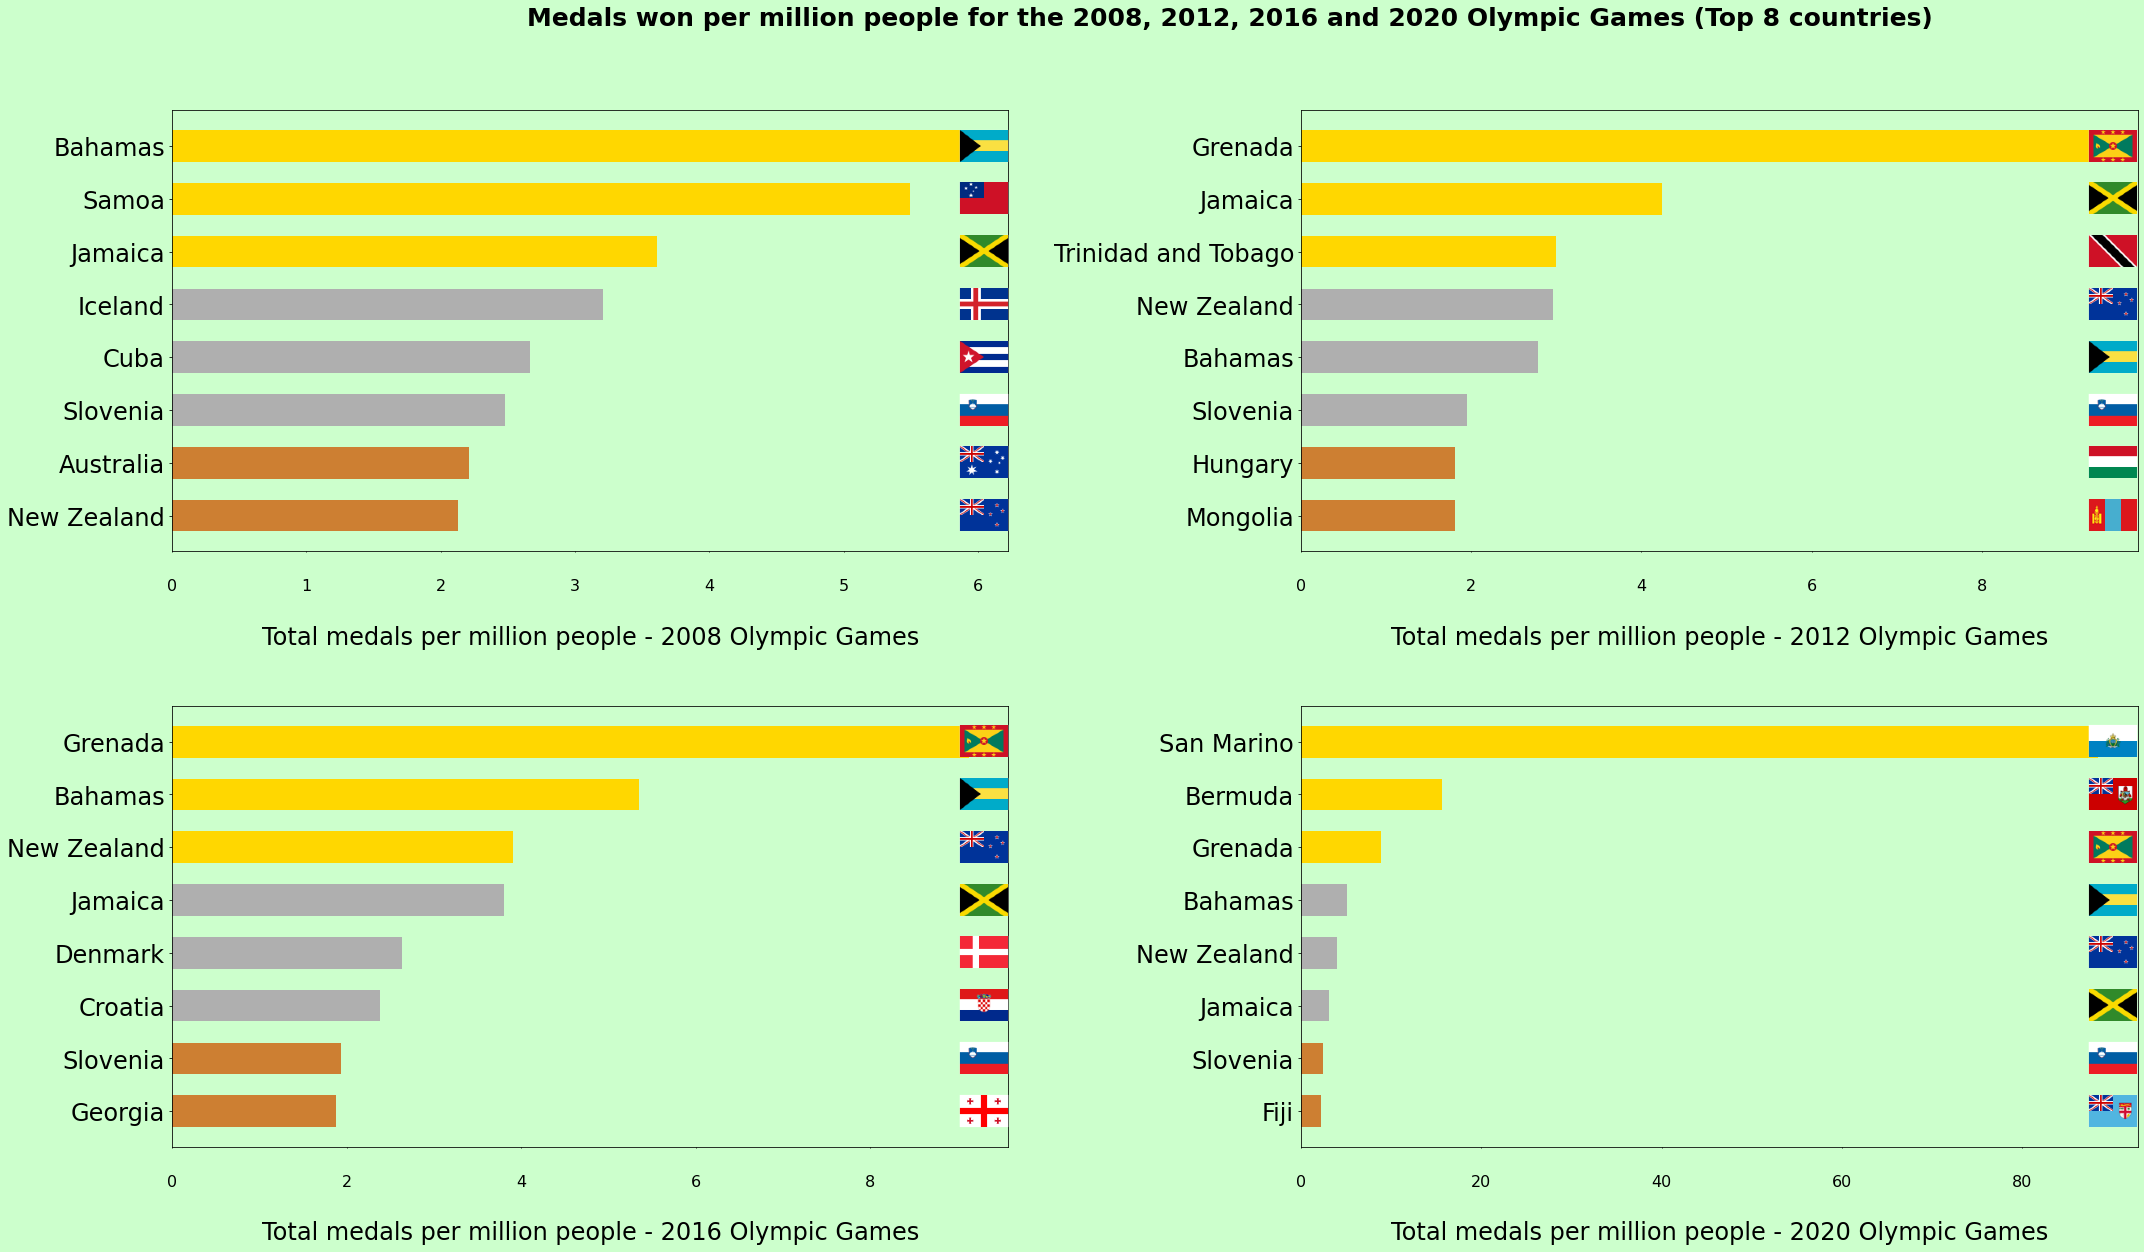

In [ ]:
plot_bars(final_df)

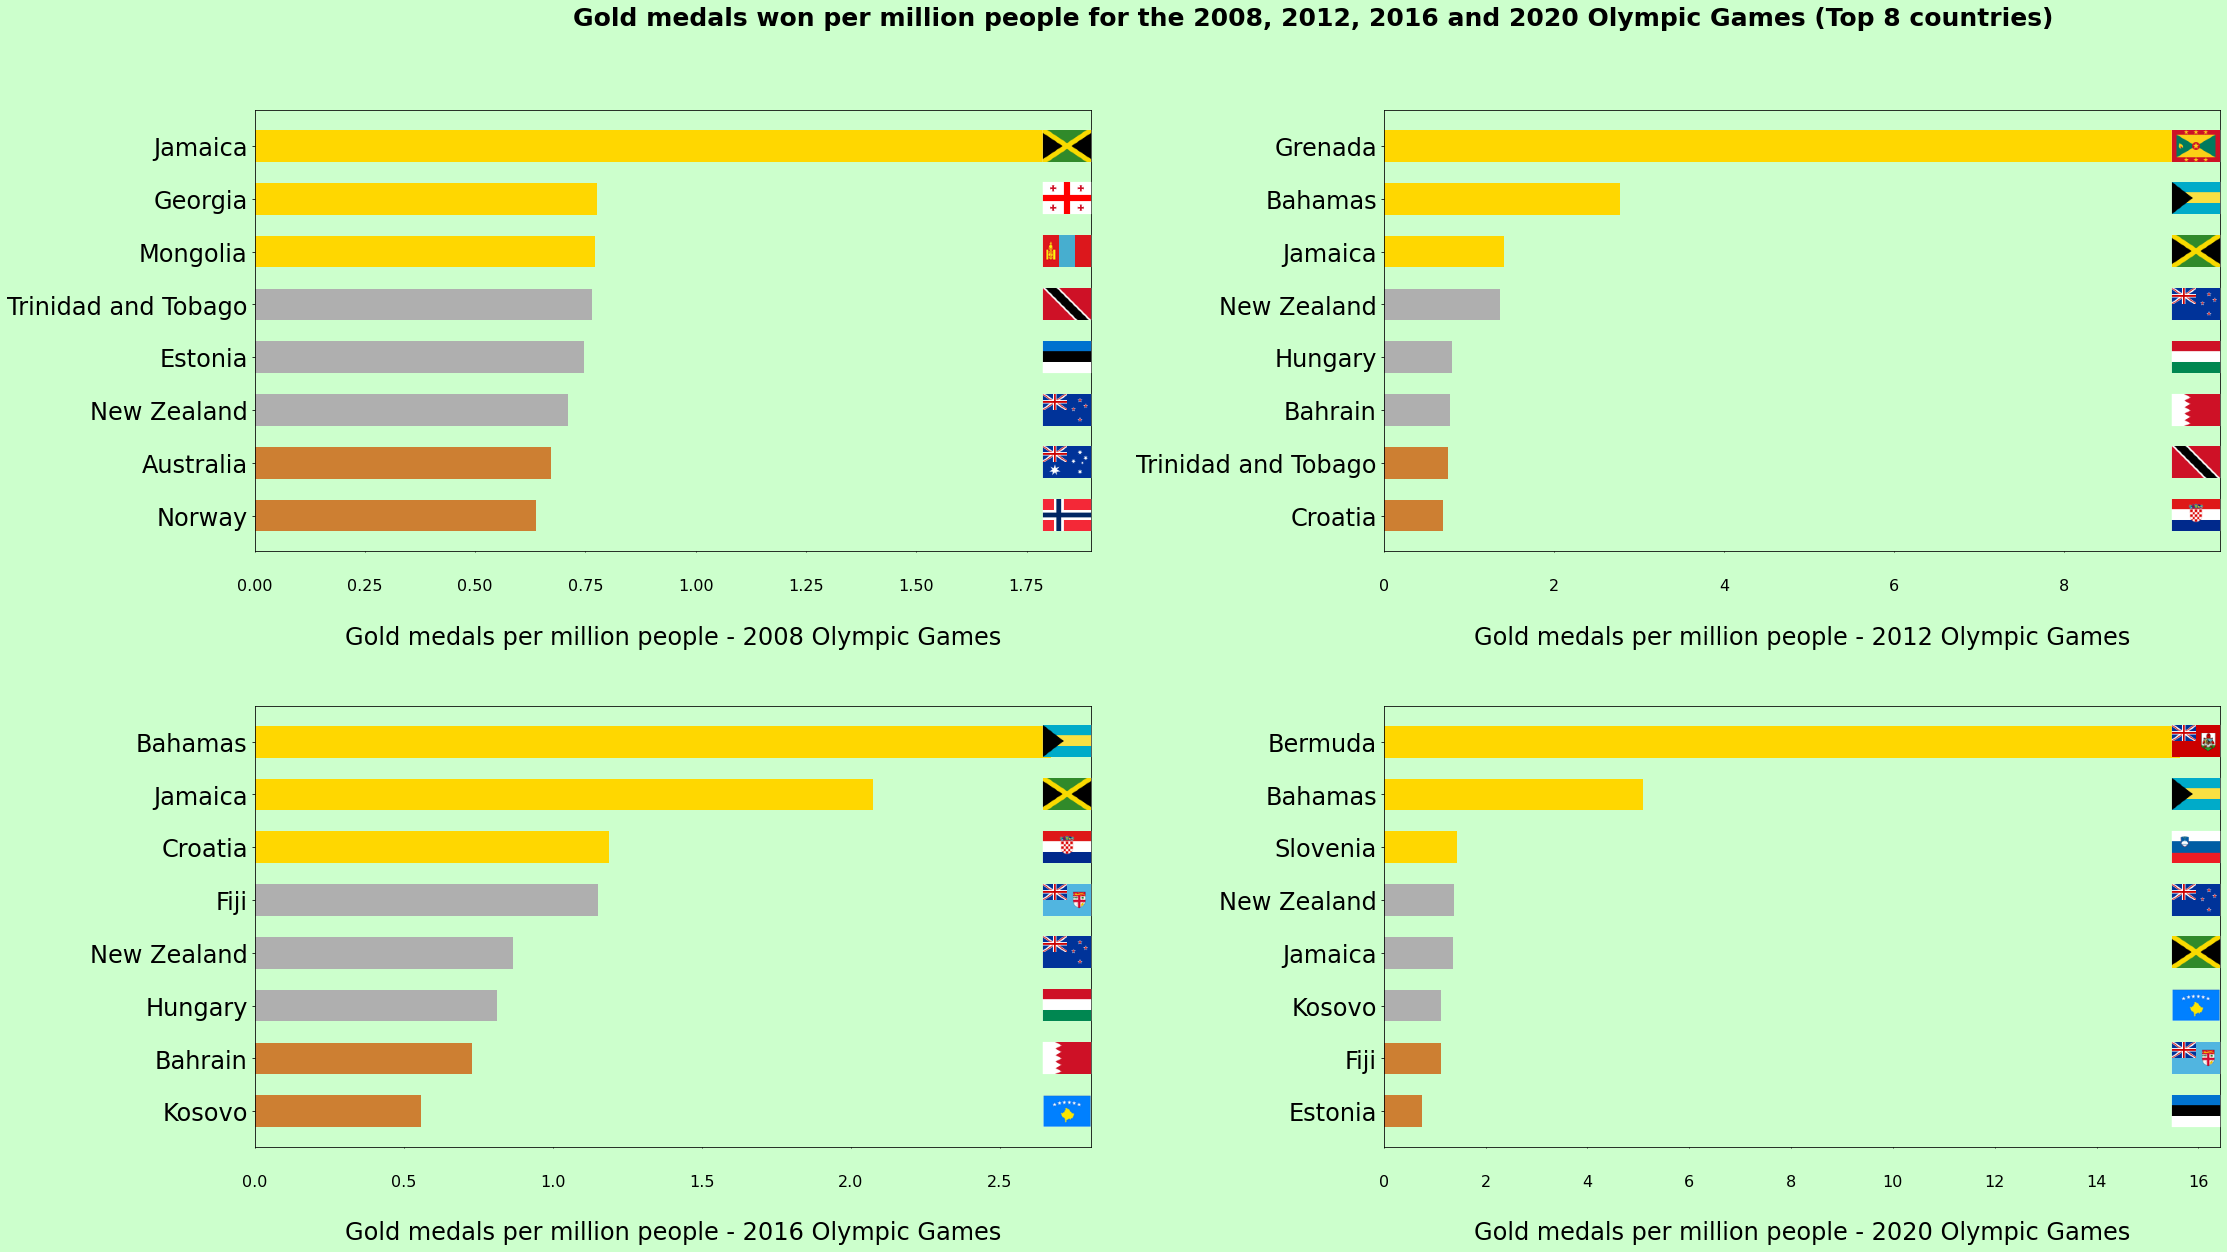

In [ ]:
plot_bars(final_df, cond="gold", title="Gold medals")

In [ ]:
def fact_checker(df):
    frames = []
    years = ["2008", "2012", "2016", "2020"]
    conds = ["total", "gold"]
    for year in years:
        for cond in conds:
        sub_frame = data_fetcher(df, cond=cond, year=year, num=8)
        frames.append(sub_frame)

    big_frame = pd.concat(frames, axis=0)

    counts = big_frame["National Olympic Committee"].value_counts()

    return counts

In [ ]:
fact_checker(final_df)

Jamaica                8
New Zealand            8
Bahamas                7
Slovenia               5
Grenada                4
Trinidad and Tobago    3
Hungary                3
Fiji                   3
Croatia                3
Bahrain                2
Georgia                2
Estonia                2
Mongolia               2
Australia              2
Kosovo                 2
Bermuda                2
Cuba                   1
San Marino             1
Iceland                1
Denmark                1
Norway                 1
Samoa                  1
Name: National Olympic Committee, dtype: int64

In [ ]:
final_df.head()

,IOC Code,Flag Code,National Olympic Committee,Country,gold_medals_2020,total_medals_2020,gold_medals_2016,total_medals_2016,gold_medals_2012,total_medals_2012,gold_medals_2008,total_medals_2008,2007 population in millions,2011 population in millions,2015 population in millions,2020 population in millions,gold_medals_ratio_2020,total_medals_ratio_2020,gold_medals_ratio_2016,total_medals_ratio_2016,gold_medals_ratio_2012,total_medals_ratio_2012,gold_medals_ratio_2008,total_medals_ratio_2008
0,AFG,AF,Afghanistan,Afghanistan,0.0,0.0,0.0,0.0,0.0,1.0,0,1,27.100542,30.117411,34.413603,38.928341,0.000000,0.000000,0.000000,0.000000,0.000000,0.033203,0.000000,0.036900
1,ALG,DZ,Algeria,Algeria,0.0,0.0,0.0,2.0,1.0,1.0,0,2,34.166976,36.661438,39.728020,43.851043,0.000000,0.000000,0.000000,0.050342,0.027277,0.027277,0.000000,0.058536
2,ARG,AR,Argentina,Argentina,0.0,3.0,3.0,4.0,1.0,4.0,2,6,39.684303,41.261490,43.131966,45.376763,0.000000,0.066113,0.069554,0.092739,0.024236,0.096943,0.050398,0.151193
3,ARM,AM,Armenia,Armenia,0.0,4.0,1.0,4.0,0.0,2.0,0,5,2.932615,2.876536,2.925559,2.963234,0.000000,1.349877,0.341815,1.367260,0.000000,0.695281,0.000000,1.704963
4,AUS,AU,Australia,Australia,17.0,46.0,8.0,29.0,8.0,35.0,14,46,20.827600,22.340024,23.815995,25.687041,0.661812,1.790786,0.335909,1.217669,0.358102,1.566695,0.672185,2.208608
